In [21]:
import pandas as pd
import json
import requests
from scipy import special
from urllib.parse import quote
%matplotlib inline 

# Get crime data 
soql = "https://data.cityofchicago.org/resource/6zsd-86xi.json?$query="
soql += quote("SELECT community_area AS Community, count(*)/5 AS No_Crimes ")
soql += quote("WHERE 2007 < year AND year < 2013 ")
soql += quote("GROUP BY Community LIMIT 10000")

resp = requests.get(soql).json()

crime_total = pd.DataFrame(resp)

# Get rid of the redundant decimal places 
crime_total.No_Crimes = crime_total.No_Crimes.astype(float)
crime_total.round(1) 

#ATTENTION HERE: problem with NaN remains unsolved!!!!
crime_total.dropna(axis = 0, how = "any", inplace = True)   
crime_total.head() 


,Community,No_Crimes
0,0,6.0
1,1,5615.4
2,10,1614.2
3,11,1478.8
4,12,689.6


In [22]:
# Get socioeconomics data 
socioeconomics = pd.read_csv("data/Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv", index_col = ['Community Area Number']) 

# Merge crime data on socioeconomics data using Communty Area Number 
crime_total.rename(columns={'Community':'Community Area Number'}, inplace = True)
crime_total.set_index('Community Area Number')

mix_total = pd.DataFrame.join(crime_total, socioeconomics)
mix_total.dropna(axis = 0, how = "any", inplace = True)  
mix_total

,Community Area Number,No_Crimes,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
1,1,5615.4,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939.0,39.0
2,10,1614.2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040.0,46.0
3,11,1478.8,Uptown,3.8,24.0,8.9,11.8,22.2,35787.0,20.0
4,12,689.6,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524.0,17.0
5,13,1247.8,North Center,0.3,7.5,5.2,4.5,26.2,57123.0,6.0
6,14,3398.2,Lake View,1.1,11.4,4.7,2.6,17.0,60058.0,5.0
7,15,4842.6,Lincoln Park,0.8,12.3,5.1,3.6,21.5,71551.0,2.0
8,16,4468.6,Near North Side,1.9,12.9,7.0,2.5,22.6,88669.0,1.0
9,17,2415.6,Edison Park,1.1,3.3,6.5,7.4,35.3,40959.0,8.0
10,18,929.4,Norwood Park,2.0,5.4,9.0,11.5,39.5,32875.0,21.0


In [23]:
mix_total_logit = mix_total.copy()

In [24]:
mix_total_logit['PERCENT OF HOUSING CROWDED'] = scipy.special.logit(mix_total_logit['PERCENT OF HOUSING CROWDED']/100)
mix_total_logit['PERCENT HOUSEHOLDS BELOW POVERTY'] = scipy.special.logit(mix_total_logit['PERCENT HOUSEHOLDS BELOW POVERTY']/100)
mix_total_logit['PERCENT AGED 16+ UNEMPLOYED'] = scipy.special.logit(mix_total_logit['PERCENT AGED 16+ UNEMPLOYED']/100)
mix_total_logit['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA'] = scipy.special.logit(mix_total_logit['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA']/100)
mix_total_logit['PERCENT AGED UNDER 18 OR OVER 64'] = scipy.special.logit(mix_total_logit['PERCENT AGED UNDER 18 OR OVER 64']/100)

In [25]:
mix_total_logit

,Community Area Number,No_Crimes,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
1,1,5615.4,Rogers Park,-2.483824,-1.174736,-2.350828,-1.502856,-0.969401,23939.0,39.0
2,10,1614.2,West Ridge,-2.469836,-1.571519,-2.338303,-1.337023,-0.468379,23040.0,46.0
3,11,1478.8,Uptown,-3.231428,-1.152680,-2.325907,-2.011507,-1.254049,35787.0,20.0
4,12,689.6,Lincoln Square,-3.346803,-2.100997,-2.415478,-1.866045,-1.072121,37524.0,17.0
5,13,1247.8,North Center,-5.806138,-2.512306,-2.903111,-3.055049,-1.035599,57123.0,6.0
6,14,3398.2,Lake View,-4.498799,-2.050519,-3.009467,-3.623315,-1.585627,60058.0,5.0
7,15,4842.6,Lincoln Park,-4.820282,-1.964323,-2.923583,-3.287572,-1.295046,71551.0,2.0
8,16,4468.6,Near North Side,-3.944133,-1.909830,-2.586689,-3.663562,-1.231037,88669.0,1.0
9,17,2415.6,Edison Park,-4.498799,-3.377691,-2.666159,-2.526809,-0.605878,40959.0,8.0
10,18,929.4,Norwood Park,-3.891820,-2.863259,-2.313635,-2.040656,-0.426343,32875.0,21.0


In [27]:
# Getting into the regression

%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid", rc={'axes.linewidth': 2.5})
sns.set_context('notebook', font_scale=1.45, rc={"lines.linewidth": 3, "figure.figsize" : (7, 3)})

import pytz

from urllib.parse import quote

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.regression.mixed_linear_model as sm_mlm

In [40]:
# # First look at the effect of hardship index on crime rate 

# crime_hardship = mix_total[['HARDSHIP INDEX','Crime_Rate']] 
# crime_hardship.head() 

In [79]:
crime_list = ['COMMUNITY AREA NAME',
 'PERCENT OF HOUSING CROWDED',
 'PERCENT HOUSEHOLDS BELOW POVERTY',
 'PERCENT AGED 16+ UNEMPLOYED',
 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
 'PERCENT AGED UNDER 18 OR OVER 64',
 'PER CAPITA INCOME ',
 'HARDSHIP INDEX']

In [94]:
'{}'.format(crime_list)

'['

In [80]:
'ax_{}_logit'.format(crime_list[1])

'ax_PERCENT OF HOUSING CROWDED_logit'

In [84]:
crime_list_se = pd.Series(crime_list)
crime_list_se

0                             COMMUNITY AREA NAME
1                      PERCENT OF HOUSING CROWDED
2                PERCENT HOUSEHOLDS BELOW POVERTY
3                     PERCENT AGED 16+ UNEMPLOYED
4    PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA
5                PERCENT AGED UNDER 18 OR OVER 64
6                              PER CAPITA INCOME 
7                                  HARDSHIP INDEX
dtype: object

In [87]:
for entry in crime_list:
    'ax_{}_logit'.format(entry) = sns.regplot(x = entry, y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6}); 
#     'ax_{}_logit'.format(entry).figure.savefig('ax_{}_logit.png'.format(entry), bbox_inches='tight', pad_inches=0.2)

SyntaxError: can't assign to function call (<ipython-input-87-d7d7e2e96bb3>, line 2)

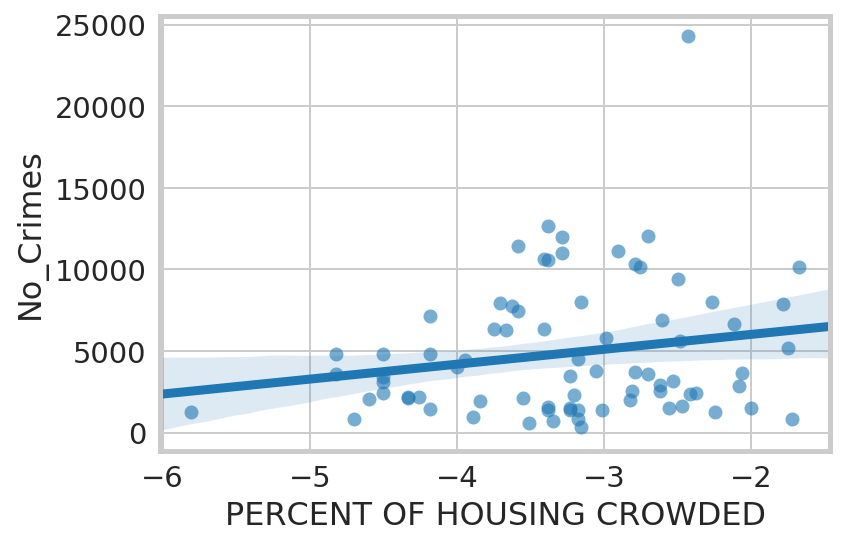

In [69]:
ax_Crowd_logit = sns.regplot(x = 'PERCENT OF HOUSING CROWDED', y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6}); 
ax_Crowd_logit.figure.savefig('ax_Crowd_logit.png', bbox_inches='tight', pad_inches=0.2)

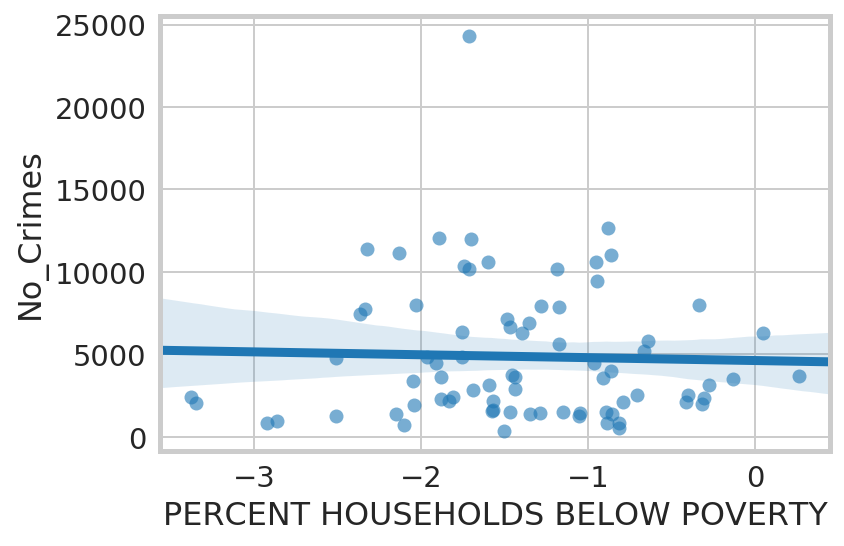

In [71]:
ax_Poverty_logit = sns.regplot(x = 'PERCENT HOUSEHOLDS BELOW POVERTY', y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6}); 
ax_Poverty_logit.figure.savefig('ax_Poverty_logit.png', bbox_inches='tight', pad_inches=0.2)

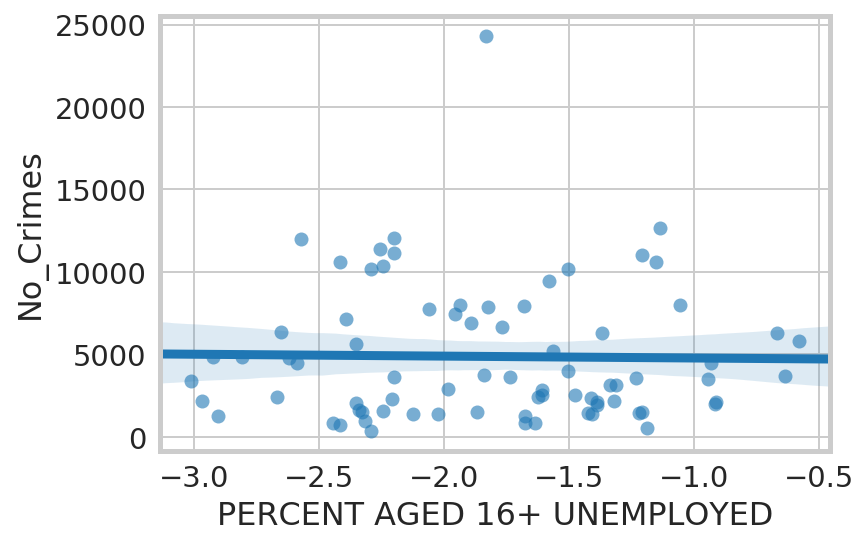

In [55]:
ax_Unemp_logit = sns.regplot(x = 'PERCENT AGED 16+ UNEMPLOYED', y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6}); 
ax_Unemp_logit.figure.savefig('ax_Unemp_logit.png', bbox_inches='tight', pad_inches=0.2)

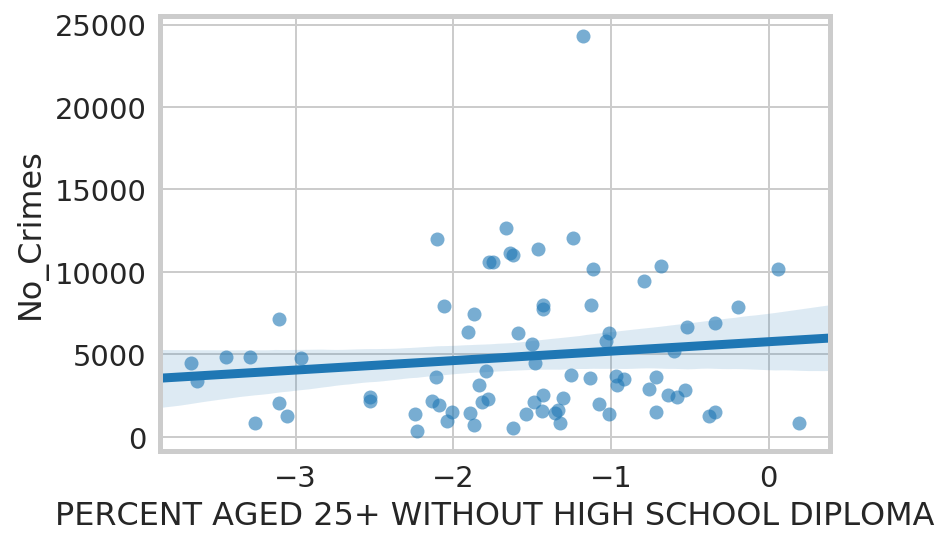

In [56]:
ax_PA25 = sns.regplot(x = 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6}); 
ax_PA25.figure.savefig('ax_PA25.png', bbox_inches='tight', pad_inches=0.2)

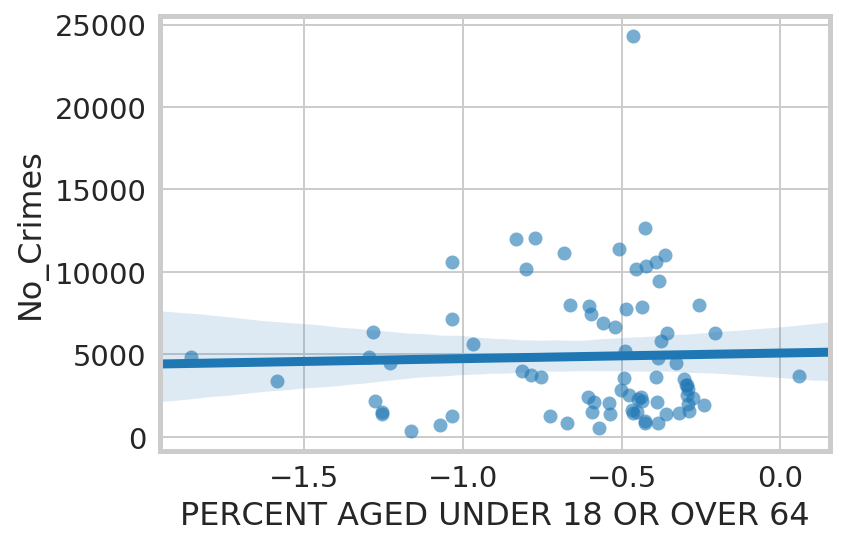

In [57]:
ax_PA = sns.regplot(x = 'PERCENT AGED UNDER 18 OR OVER 64', y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6}); 
ax_PA.figure.savefig('ax_PA.png', bbox_inches='tight', pad_inches=0.2)

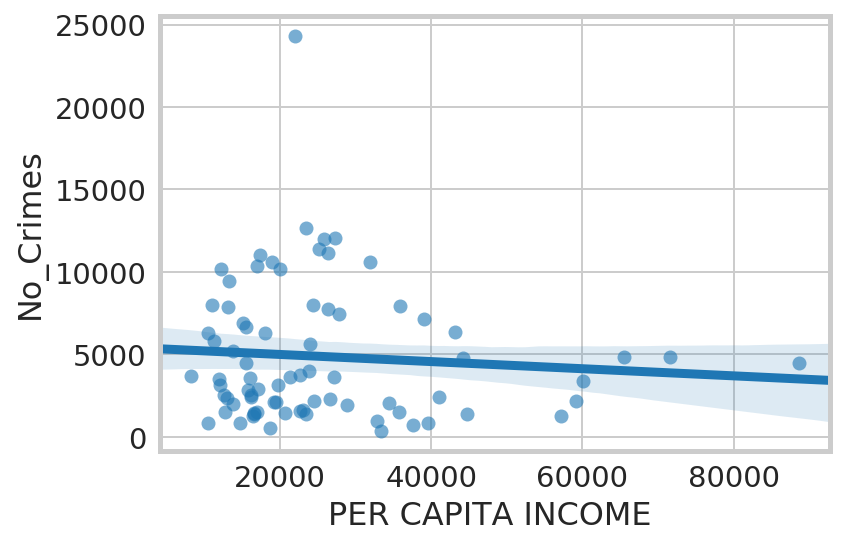

In [58]:
ax_PCI = sns.regplot(x = 'PER CAPITA INCOME ', y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6}); 
ax_PCI.figure.savefig('ax_PCI.png', bbox_inches='tight', pad_inches=0.2)

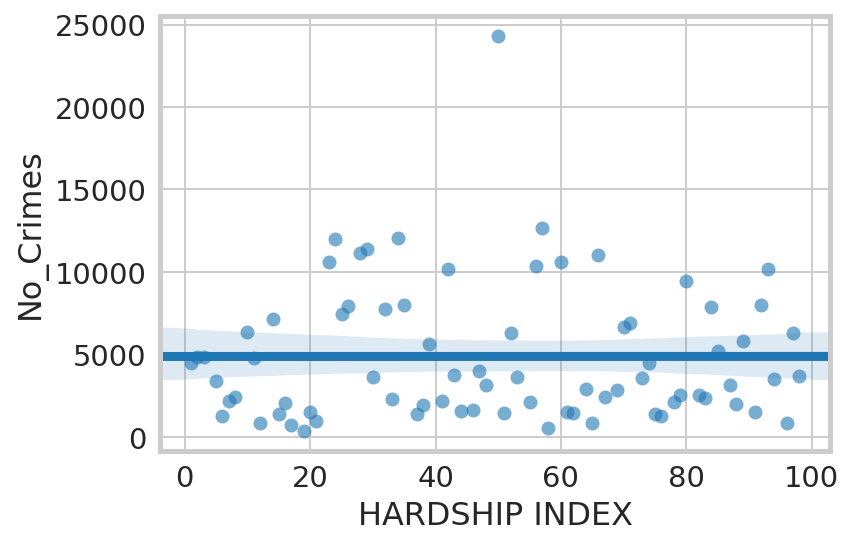

In [59]:
ax_HI = sns.regplot(x = 'HARDSHIP INDEX', y = 'No_Crimes', data = mix_total_logit, scatter_kws = {"alpha" : 0.6}); 
ax_HI.figure.savefig('ax_HI.png', bbox_inches='tight', pad_inches=0.2)

In [29]:
# # Notice that there is a dot especially higher than all the others

# mix_total[mix_total.Crime_Rate >= 20000]  

# # So that outlier is Montclaire. 

In [34]:
# ols_cr_hard = smf.ols(formula = "NC ~ H",
#               data = crime_hardship.rename(columns = {"HARDSHIP INDEX":"H","No_Crimes":"NC"})) 
# model_cr_hard = ols_cr_hard.fit()
# model_cr_hard.summary() 

result = smf.ols('NC ~ HI', 
                 data = mix_total_logit.rename(columns = {'HARDSHIP INDEX':'HI', 'No_Crimes':'NC'})
                )
result.fit().summary()

# the coefficient for hardship index in not statistically significant 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     NC   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                 2.939e-06
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.999
Time:                        00:22:09   Log-Likelihood:                -749.56
No. Observations:                  77   AIC:                             1503.
Df Residuals:                      75   BIC:                             1508.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4872.3766    945.818      5.151      0.000    2988.210    6756.543
HI             0.0284     16.557      0.002      0.999     -32.954      33.011
==============================================================================
Omnibus:                       40.648   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.204
Skew:                           1.744   Prob(JB):                     4.32e-25
Kurtosis:                       7.775   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
### So generally speaking, since hardship index consists too much information about the socioeconomic status, it is not an ideal choice for us to explore the reason why different communities have different crime rates.

#### Next, we will turn into different aspects of socioeconomic indicators. 

In [38]:
### First, we choose to look at the "poverty level". And we predict that there is a statistically significant positive relation between "PERCENT HOUSEHOLDS BELOW POVERTY" and crime rate. 

crime_poverty = mix_total[['PERCENT HOUSEHOLDS BELOW POVERTY','Crime_Rate']] 
crime_poverty.head() 

,PERCENT HOUSEHOLDS BELOW POVERTY,Crime_Rate
1,23.6,5615.4
2,17.2,1614.2
3,24.0,1478.8
4,10.9,689.6
5,7.5,1247.8


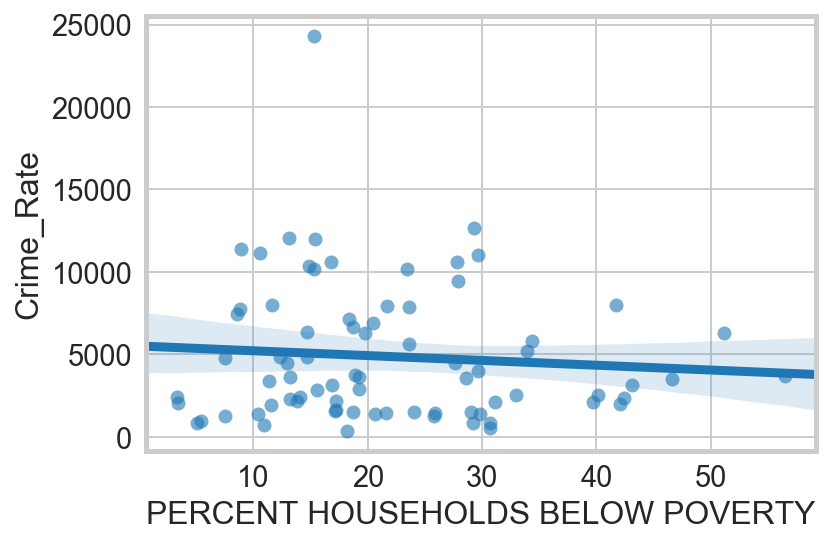

In [39]:
sns.regplot(x = 'PERCENT HOUSEHOLDS BELOW POVERTY', y = 'Crime_Rate', data = crime_poverty, scatter_kws = {"alpha" : 0.6}); 

In [24]:
crime_crowd = mix_total[['PERCENT OF HOUSING CROWDED','Crime_Rate']] 
crime_crowd.head()

,PERCENT OF HOUSING CROWDED,Crime_Rate
1,-2.483824,5615.4
2,-2.469836,1614.2
3,-3.231428,1478.8
4,-3.346803,689.6
5,-5.806138,1247.8


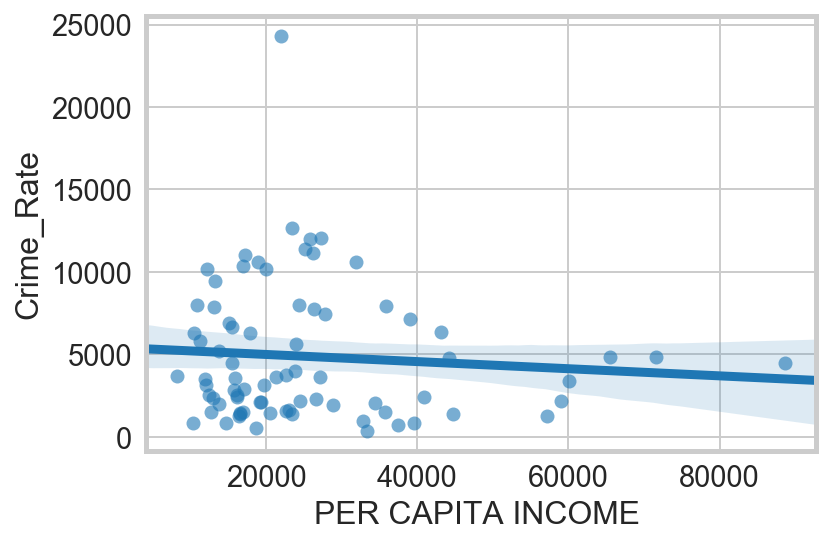

In [47]:
crime_income = mix_total[['PER CAPITA INCOME ','Crime_Rate']] 
sns.regplot(x = 'PER CAPITA INCOME ', y = 'Crime_Rate', data = crime_income, scatter_kws = {"alpha" : 0.6});

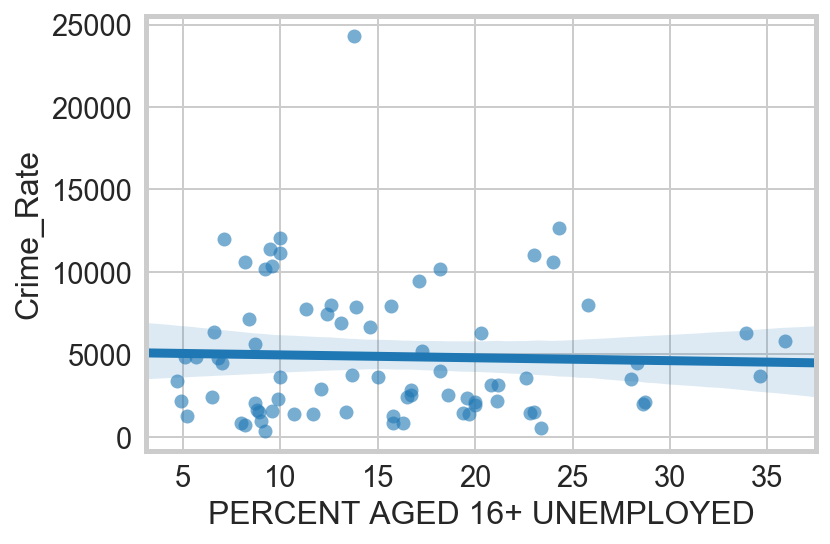

In [48]:
crime_employ = mix_total[['PERCENT AGED 16+ UNEMPLOYED','Crime_Rate']] 
sns.regplot(x = 'PERCENT AGED 16+ UNEMPLOYED', y = 'Crime_Rate', data = crime_employ, scatter_kws = {"alpha" : 0.6});

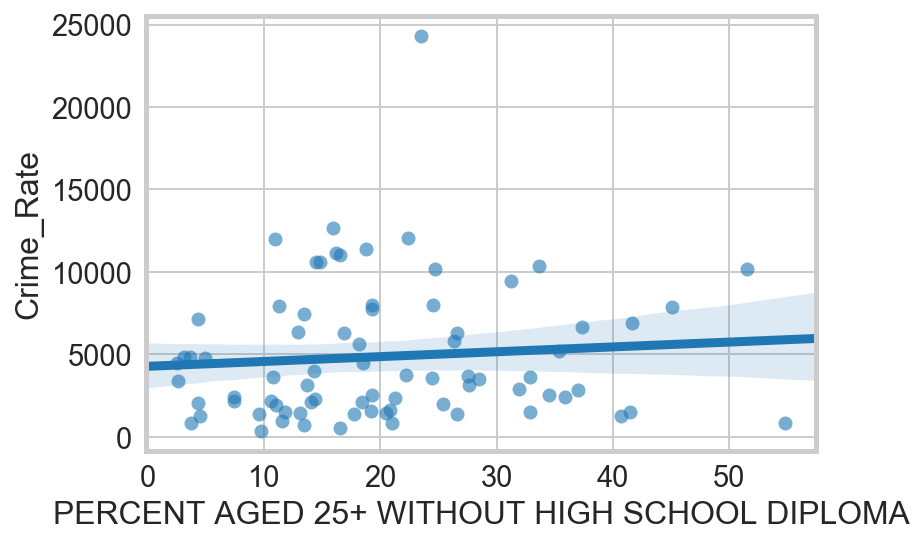

In [49]:
crime_edu = mix_total[['PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA','Crime_Rate']] 
sns.regplot(x = 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', y = 'Crime_Rate', data = crime_edu, scatter_kws = {"alpha" : 0.6});


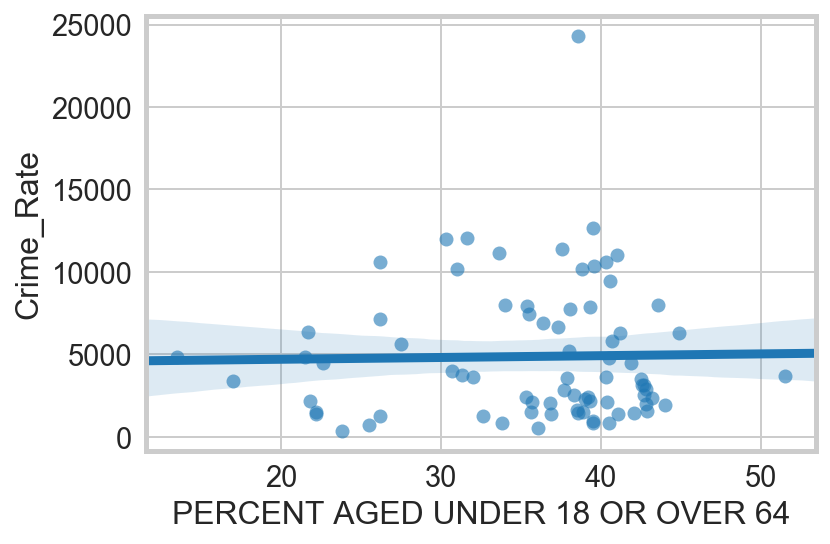

In [50]:
crime_age = mix_total[['PERCENT AGED UNDER 18 OR OVER 64','Crime_Rate']] 
sns.regplot(x = 'PERCENT AGED UNDER 18 OR OVER 64', y = 'Crime_Rate', data = crime_age, scatter_kws = {"alpha" : 0.6});

In [52]:
list(mix_total)

['Community Area Number',
 'Crime_Rate',
 'COMMUNITY AREA NAME',
 'PERCENT OF HOUSING CROWDED',
 'PERCENT HOUSEHOLDS BELOW POVERTY',
 'PERCENT AGED 16+ UNEMPLOYED',
 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
 'PERCENT AGED UNDER 18 OR OVER 64',
 'PER CAPITA INCOME ',
 'HARDSHIP INDEX']

In [62]:
ols = smf.ols(formula = "Crime ~ Crowd + Poverty + Unemp + Edu + Age +Income",
              data = mix_total_logit.rename(columns = {"No_Crimes"                            : "Crime", 
                                                 "PERCENT OF HOUSING CROWDED"                 : "Crowd", 
                                                 "PERCENT HOUSEHOLDS BELOW POVERTY"           : "Poverty", 
                                                 "PERCENT AGED 16+ UNEMPLOYED"                : "Unemp",
                                                 "PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA": "Edu",
                                                 "PERCENT AGED UNDER 18 OR OVER 64"           : "Age", 
                                                 "PER CAPITA INCOME "                         : "Income",}))
model = ols.fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Crime   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.7487
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.612
Time:                        00:54:42   Log-Likelihood:                -747.16
No. Observations:                  77   AIC:                             1508.
Df Residuals:                      70   BIC:                             1525.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8931.1397   3238.900      2.757      0.007    2471.357    1.54e+04
Crowd       1802.6252   1181.362      1.526      0.132    -553.527    4158.777
Poverty    -1055.2566   1202.685     -0.877      0.383   -3453.936    1343.423
Unemp        338.3121   1934.002      0.175      0.862   -3518.933    4195.557
Edu         -802.2854   1550.981     -0.517      0.607   -3895.620    2291.050
Age          -54.0370   2669.038     -0.020      0.984   -5377.266    5269.192
Income        -0.0141      0.087     -0.161      0.872      -0.188       0.160
==============================================================================
Omnibus:                       31.926   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.346
Skew:                           1.443   Prob(JB):                     8.74e-16
Kurtosis:                       6.646   Cond. No.                     2.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

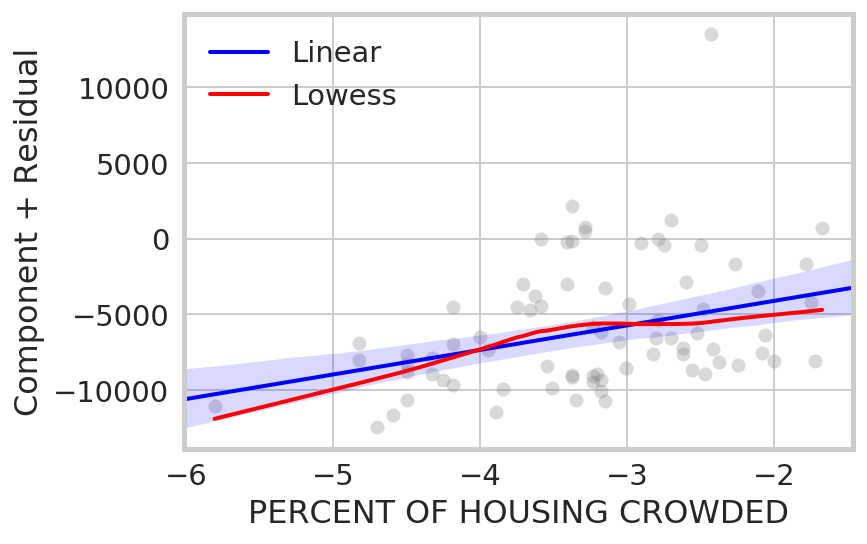

In [65]:
chc = pd.Series(name = "Component + Residual", data = model.resid + mix_total_logit["PERCENT OF HOUSING CROWDED"] * model.
                params["Crowd"])
ax = sns.regplot(x = mix_total_logit["PERCENT OF HOUSING CROWDED"], y = chc, scatter = True, fit_reg = False,
            scatter_kws = {"alpha" : 0.3, "color" : "grey"})
sns.regplot(x = mix_total_logit["PERCENT OF HOUSING CROWDED"], y = chc, scatter = False, 
            lowess = False, robust = True, label = "Linear",
            scatter_kws = {"alpha" : 0.3, "color" : "grey"}, line_kws = {"color" : "blue", "linewidth" : 2})
sns.regplot(x = mix_total_logit["PERCENT OF HOUSING CROWDED"], y = chc, scatter = False, 
            lowess = True, label = "Lowess",
            scatter_kws = {"alpha" : 0}, line_kws = {"color" : "red", "linewidth" : 2}, ax = ax);

ax.legend()

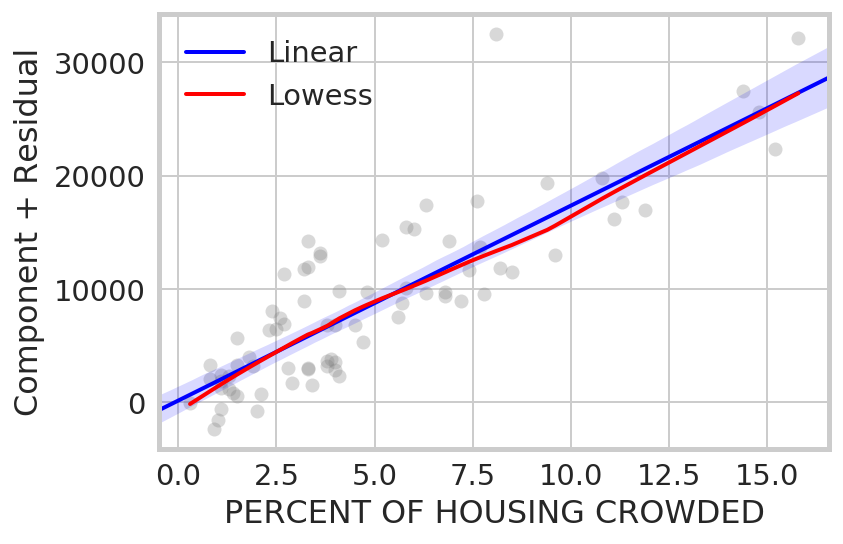

In [66]:
chc = pd.Series(name = "Component + Residual", data = model.resid + mix_total["PERCENT OF HOUSING CROWDED"] * model.
                params["Crowd"])
ax = sns.regplot(x = mix_total["PERCENT OF HOUSING CROWDED"], y = chc, scatter = True, fit_reg = False,
            scatter_kws = {"alpha" : 0.3, "color" : "grey"})
sns.regplot(x = mix_total["PERCENT OF HOUSING CROWDED"], y = chc, scatter = False, 
            lowess = False, robust = True, label = "Linear",
            scatter_kws = {"alpha" : 0.3, "color" : "grey"}, line_kws = {"color" : "blue", "linewidth" : 2})
sns.regplot(x = mix_total["PERCENT OF HOUSING CROWDED"], y = chc, scatter = False, 
            lowess = True, label = "Lowess",
            scatter_kws = {"alpha" : 0}, line_kws = {"color" : "red", "linewidth" : 2}, ax = ax);

ax.legend()

In [37]:
mix_total_logit.columns

Index(['Community Area Number', 'No_Crimes', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')

In [38]:
result2 = smf.ols('NC ~ PHC + PHBP + PA16 + PA25 + PA + PCI + HI', 
                 data = mix_total_logit.rename(columns = {'No_Crimes':'NC',
                                                          'PERCENT OF HOUSING CROWDED':'PHC',
                                                          'PERCENT HOUSEHOLDS BELOW POVERTY':'PHBP',
                                                          'PERCENT AGED 16+ UNEMPLOYED':'PA16',
                                                          'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA':'PA25',
                                                          'PERCENT AGED UNDER 18 OR OVER 64':'PA',
                                                          'PER CAPITA INCOME ':'PCI',
                                                          'HARDSHIP INDEX':'HI'
                                                          })
                )
result2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     NC   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.105
Date:                Fri, 01 Dec 2017   Prob (F-statistic):              0.370
Time:                        00:37:02   Log-Likelihood:                -745.47
No. Observations:                  77   AIC:                             1507.
Df Residuals:                      69   BIC:                             1526.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.349e+04   8856.124      2.653      0.010    5826.529    4.12e+04
PHC         2159.7030   1181.464      1.828      0.072    -197.253    4516.659
PHBP         511.6097   1481.291      0.345      0.731   -2443.485    3466.705
PA16        1522.3106   2020.436      0.753      0.454   -2508.349    5552.971
PA25         723.0797   1756.129      0.412      0.682   -2780.301    4226.460
PA          2220.4734   2929.227      0.758      0.451   -3623.175    8064.122
PCI            0.0045      0.087      0.052      0.959      -0.168       0.177
HI          -115.8227     65.704     -1.763      0.082    -246.898      15.252
==============================================================================
Omnibus:                       28.040   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.718
Skew:                           1.286   Prob(JB):                     4.83e-13
Kurtosis:                       6.327   Cond. No.                     5.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""